# Data preprocessing

In [19]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
import os

## Extract for team-based data

Extract table(s), how ever many you want

In [20]:
# List XML files
xml_files = [
    "/Users/hungduong/Documents/MSBA UofU/MSBA 3rd/UofU-Soccer-Analytics/Utah State/Pacific Tigers - Utah St. Aggies 1-0 (Team-based).xml",
    "/Users/hungduong/Documents/MSBA UofU/MSBA 3rd/UofU-Soccer-Analytics/Utah State/Utah St. Aggies - Kansas Jayhawks 0-0 (Team-based).xml",
    "/Users/hungduong/Documents/MSBA UofU/MSBA 3rd/UofU-Soccer-Analytics/Utah State/Washington State Cougars - Utah St. Aggies 0-1 (Team-based).xml"  
]

all_rows = []

for file in xml_files:
    tree = ET.parse(file)
    root = tree.getroot()

    # Extract match name from filename (remove .xml)
    match_name = os.path.splitext(os.path.basename(file))[0]

    # Extract all instance elements
    instances = root.find("ALL_INSTANCES").findall("instance")

    for inst in instances:
        row = {
            'match_name': match_name,  # New column for match name
            'ID': inst.findtext('ID'),
            'code': inst.findtext('code'),
            'start': inst.findtext('start'),
            'end': inst.findtext('end')
        }

        players = []
        for label in inst.findall('label'):
            group = label.findtext('group')
            text = label.findtext('text')

            if group == '10 - Players':
                players.append(text)
            else:
                row[group] = text

        row['10 - Players'] = ', '.join(players)
        all_rows.append(row)

# Convert to DataFrame
team_data = pd.DataFrame(all_rows)

# Convert numeric columns
numeric_cols = [
    '11 - Start location X',
    '12 - Start location Y',
    '13 - Duration',
    '15 - End location X',
    '16 - End location Y'
]

for col in numeric_cols:
    if col in team_data.columns:
        team_data[col] = pd.to_numeric(team_data[col], errors='coerce')

team_data.reset_index(drop=True, inplace=True)

In [21]:
team_data.head(10)

,match_name,ID,code,start,end,01 - Location third,02 - Location flank,03 - End location third,04 - End location flank,05 - Length,...,11 - Start location X,12 - Start location Y,13 - Duration,14 - Formation,15 - End location X,16 - End location Y,10 - Players,08 - Transition,07 - Outcome,09 - xG
0,Pacific Tigers - Utah St. Aggies 1-0 (Team-based),1,Ball in play,5.957905,20.900188,Middle third,Center,Final third,Left flank,Medium,...,54.0,35.0,14.0,4-2-3-1,35.0,48.0,"32. Johnson, 8. Jensen, 7. Gagliano, 18. Jones...",NaN,NaN,NaN
1,Pacific Tigers - Utah St. Aggies 1-0 (Team-based),2,Pacific Tigers - Possessions,5.957905,20.900188,Middle third,Center,Final third,Left flank,Medium,...,54.0,35.0,14.0,4-2-3-1,35.0,48.0,"32. Johnson, 8. Jensen, 7. Gagliano, 18. Jones...",NaN,NaN,NaN
2,Pacific Tigers - Utah St. Aggies 1-0 (Team-based),3,Ball in play,20.890188,41.466389,Own third,Right flank,Final third,Left flank,Medium,...,35.0,48.0,20.0,4-3-3,30.0,57.0,"2. Sofonia, 17. Yonaha, 19. Miller, 7. Chamber...",Medium,NaN,NaN
3,Pacific Tigers - Utah St. Aggies 1-0 (Team-based),4,Utah St. Aggies - Possessions,20.890188,41.466389,Own third,Right flank,Final third,Left flank,Medium,...,35.0,48.0,20.0,4-3-3,30.0,57.0,"2. Sofonia, 17. Yonaha, 19. Miller, 7. Chamber...",Medium,NaN,NaN
4,Pacific Tigers - Utah St. Aggies 1-0 (Team-based),5,Ball in play,41.456389,43.596498,Own third,Right flank,Own third,Right flank,Short,...,30.0,57.0,1.0,4-2-3-1,76.0,11.0,17. Villagran,NaN,NaN,NaN
5,Pacific Tigers - Utah St. Aggies 1-0 (Team-based),6,Pacific Tigers - Possessions,41.456389,43.596498,Own third,Right flank,Own third,Right flank,Short,...,30.0,57.0,1.0,4-2-3-1,76.0,11.0,17. Villagran,NaN,NaN,NaN
6,Pacific Tigers - Utah St. Aggies 1-0 (Team-based),7,Ball in play,57.161907,78.522277,Own third,Right flank,Final third,Right flank,Long,...,29.0,57.0,20.0,4-2-3-1,16.0,5.0,"34. Cooper, 18. Jones, 17. Villagran, 7. Gagli...",NaN,NaN,NaN
7,Pacific Tigers - Utah St. Aggies 1-0 (Team-based),8,Pacific Tigers - Possessions,57.161907,78.522277,Own third,Right flank,Final third,Right flank,Long,...,29.0,57.0,20.0,4-2-3-1,16.0,5.0,"34. Cooper, 18. Jones, 17. Villagran, 7. Gagli...",NaN,NaN,NaN
8,Pacific Tigers - Utah St. Aggies 1-0 (Team-based),9,Ball in play,78.512277,81.562797,Own third,Left flank,Own third,Left flank,Short,...,16.0,5.0,2.0,4-3-3,87.0,68.0,23. Barrera,NaN,NaN,NaN
9,Pacific Tigers - Utah St. Aggies 1-0 (Team-based),10,Utah St. Aggies - Possessions,78.512277,81.562797,Own third,Left flank,Own third,Left flank,Short,...,16.0,5.0,2.0,4-3-3,87.0,68.0,23. Barrera,NaN,NaN,NaN


In [22]:
for code in team_data['code'].unique():
    print(code)  

Ball in play
Pacific Tigers - Possessions
Utah St. Aggies - Possessions
Pacific Tigers - Highlights
Pacific Tigers - Set Pieces
Pacific Tigers - Crosses
Pacific Tigers - Shots
Pacific Tigers - Throw ins
Utah St. Aggies - Open play attacks
Utah St. Aggies - Crosses
Utah St. Aggies - Goalkeeper distributions
Pacific Tigers - Goalkeeper distributions
Utah St. Aggies - Highlights
Utah St. Aggies - Set Pieces
Utah St. Aggies - Free kicks
Utah St. Aggies - Shots
Utah St. Aggies - Throw ins
Pacific Tigers - Open play attacks
Pacific Tigers - Free kicks
Pacific Tigers - Corners
Utah St. Aggies - Corners
Pacific Tigers - Goals
Periods
Kansas Jayhawks - Possessions
Kansas Jayhawks - Goalkeeper distributions
Kansas Jayhawks - Set Pieces
Kansas Jayhawks - Throw ins
Kansas Jayhawks - Crosses
Kansas Jayhawks - Open play attacks
Kansas Jayhawks - Shots
Kansas Jayhawks - Corners
Utah St. Aggies - Counterattacks
Kansas Jayhawks - Highlights
Kansas Jayhawks - Free kicks
Washington State Cougars - Posses

In [23]:
for Outcome in team_data['07 - Outcome'].unique():
    print(Outcome)  

nan
Shot
Shot on goal
Goal


## Extract for player-based data

In [24]:
# Load XML
tree = ET.parse("/Users/hungduong/Documents/MSBA UofU/MSBA 3rd/UofU-Soccer-Analytics/Utah State/Utah St. Aggies - Kansas Jayhawks 0-0 (Player-based).xml")
root = tree.getroot()

# Prepare list for rows
data = []

# Iterate over each instance
for inst in root.findall('.//instance'):
    row = {}
    row['ID'] = int(inst.findtext('ID'))
    row['Player Code'] = inst.findtext('code')
    row['Start Time'] = float(inst.findtext('start'))
    row['End Time'] = float(inst.findtext('end'))

    # Extract all <text> labels
    labels = [label.findtext('text') for label in inst.findall('label')]
    if labels:
        row['Action Type'] = labels[0]                   # Primary label
        row['Additional Labels'] = ', '.join(labels[1:]) # Others (if any)
    else:
        row['Action Type'] = None
        row['Additional Labels'] = ''

    data.append(row)

# Convert to DataFrame
player_data = pd.DataFrame(data)


In [25]:
pd.set_option('display.max_colwidth', None)
player_data.head(10)


,ID,Player Code,Start Time,End Time,Action Type,Additional Labels
0,1,2. Sofonia,8.269643,14.834373,Pass,Short or medium pass
1,2,41. Winder,11.834373,16.848240,Pass,"Carry, Short or medium pass"
2,3,41. Winder,14.848240,18.848240,Interception,Loss
3,4,99. Moore,13.867879,18.867879,Pass,"Back pass, Recovery, Short or medium pass"
4,5,15. Castans,15.945419,19.945419,Touch,
5,6,41. Winder,25.390332,29.390332,Throw in,
6,7,2. Page,27.317856,31.317856,Duel,"Aerial duel, Loss"
7,8,7. Chambers,28.194309,33.194309,Pass,"Back pass, Head pass, Recovery, Counterpressing recovery, Short or medium pass"
8,9,9. Christian,29.766819,34.766819,Pass,"Forward pass, Head pass, Pass to final third, Short or medium pass"
9,10,7. Chambers,32.294047,36.294047,Duel,"Ground duel, Offensive duel, Carry"


In [26]:
print(len(player_data))
# Data missingness
print(player_data.isna().count())
# Data types?
player_data.dtypes

1563
ID                   1563
Player Code          1563
Start Time           1563
End Time             1563
Action Type          1563
Additional Labels    1563
dtype: int64


ID                     int64
Player Code           object
Start Time           float64
End Time             float64
Action Type           object
Additional Labels     object
dtype: object

### Add optional team column for player_data (chatgpt this real quick)

In [27]:
utah_state_players = [
    "0. Rath", "41. Winder", "2. Sofonia", "28. Wilson", "23. Barrera",
    "19. Miller", "17. Yonaha", "14. Diamond", "9. Christian", "7. Chambers", "3. Mullenmeister",
    "12. Werts", "13. Hirai", "5. Hendrix", "24. Reitz", "6. Sellers",
    "25. H. Barrera", "15. T. Winder", "55. Conner", "10. Samantha", "16. Velazco"
]

kansas_jayhawks_players = [
    "0. Dawe", "11. Fjelstad", "31. Skwierawski", "2. Page", "17. Tobin",
    "34. Gregorski", "8. Langfelder", "15. Castans", "99. Moore", "4. Wimes", "18. Watts",
    "6. Kawagishi", "14. Viets", "19. Sola", "10. Rowan", "23. Herrema",
    "27. Rasmussen", "12. McLaughlin", "7. Johnston", "9. Shepherd"
]



player_to_team = {p: "Utah State" for p in utah_state_players}
player_to_team.update({p: "Kansas" for p in kansas_jayhawks_players})

player_data['Team'] = player_data['Player Code'].map(player_to_team)



In [28]:
player_data.head()

,ID,Player Code,Start Time,End Time,Action Type,Additional Labels,Team
0,1,2. Sofonia,8.269643,14.834373,Pass,Short or medium pass,Utah State
1,2,41. Winder,11.834373,16.848240,Pass,"Carry, Short or medium pass",Utah State
2,3,41. Winder,14.848240,18.848240,Interception,Loss,Utah State
3,4,99. Moore,13.867879,18.867879,Pass,"Back pass, Recovery, Short or medium pass",Kansas
4,5,15. Castans,15.945419,19.945419,Touch,,Kansas


Available actions of player_data in Action Type

In [29]:
for action in player_data['Action Type'].dropna().unique():
    print(action)

Pass
Interception
Touch
Throw in
Duel
Goal kick
Shot
Shot against
Acceleration
Clearance
Goalkeeper exit
Infraction
Free kick
Corner
Offside


# Analytics

## Corners 

Filter for corner kicks in team_data

In [30]:
team_corners = team_data[team_data['code'].str.contains('Utah St. Aggies - Corners')]
pd.set_option('display.max_colwidth', None)
team_corners.tail()

,match_name,ID,code,start,end,01 - Location third,02 - Location flank,03 - End location third,04 - End location flank,05 - Length,...,11 - Start location X,12 - Start location Y,13 - Duration,14 - Formation,15 - End location X,16 - End location Y,10 - Players,08 - Transition,07 - Outcome,09 - xG
3412,Washington State Cougars - Utah St. Aggies 0-1 (Team-based),766,Utah St. Aggies - Corners,3460.035232,3468.542724,Final third,Right flank,Final third,Center,Short,...,105.0,68.0,7.0,4-4-2,16.0,24.0,"14. Diamond, 9. Christian",NaN,NaN,NaN
3517,Washington State Cougars - Utah St. Aggies 0-1 (Team-based),871,Utah St. Aggies - Corners,3992.828894,3997.899719,Final third,Right flank,Final third,Center,Short,...,105.0,68.0,3.0,4-2-3-1,3.0,38.0,"17. Yonaha, 28. Wilson",NaN,NaN,NaN
3741,Washington State Cougars - Utah St. Aggies 0-1 (Team-based),1095,Utah St. Aggies - Corners,5066.902349,5073.544331,Final third,Left flank,Final third,Center,Short,...,105.0,0.0,2.0,4-2-3-1,11.0,37.0,"14. Diamond, 19. Miller",NaN,Shot,less than 0.1
3756,Washington State Cougars - Utah St. Aggies 0-1 (Team-based),1110,Utah St. Aggies - Corners,5093.934058,5097.112709,Final third,Left flank,Final third,Left flank,Short,...,105.0,0.0,1.0,4-2-3-1,3.0,49.0,14. Diamond,NaN,NaN,NaN
3768,Washington State Cougars - Utah St. Aggies 0-1 (Team-based),1122,Utah St. Aggies - Corners,5129.424841,5133.018479,Final third,Left flank,Final third,Center,Short,...,105.0,0.0,1.0,4-2-3-1,6.0,33.0,14. Diamond,NaN,NaN,NaN


Further filter by outcome for visualization

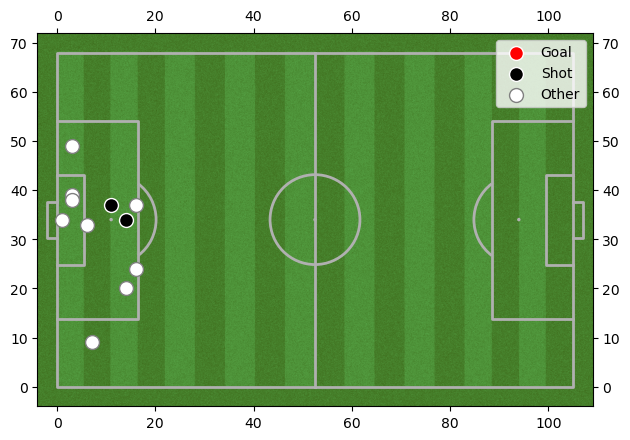

In [31]:

# Filter by outcome
corners_goal = team_corners[team_corners['07 - Outcome'] == 'Goal']
corners_shot = team_corners[team_corners['07 - Outcome'] == 'Shot']
corners_other = team_corners[
    (team_corners['07 - Outcome'] != 'Goal') & 
    (team_corners['07 - Outcome'] != 'Shot')
]
# Draw pitch
pitch = Pitch(
    pitch_length=105, pitch_width=68, pitch_type='uefa',
    pitch_color='grass', stripe=True, goal_type='box',
    #half=True, 
    label=True, axis=True, tick=True
)
fig, ax = pitch.draw()

# Plot Goal events in red
ax.scatter(
    corners_goal['15 - End location X'],
    corners_goal['16 - End location Y'],
    c='red', s=100, edgecolors='white', label='Goal'
)

# Plot Shot events in black
ax.scatter(
    corners_shot['15 - End location X'],
    corners_shot['16 - End location Y'],
    c='black', s=100, edgecolors='white', label='Shot'
)

# Plot all other events in white
ax.scatter(
    corners_other['15 - End location X'],
    corners_other['16 - End location Y'],
    c='white', s=100, edgecolors='gray', label='Other'
)

# Add legend and show
plt.legend()
plt.show()

<Axes: xlabel='10 - Players'>

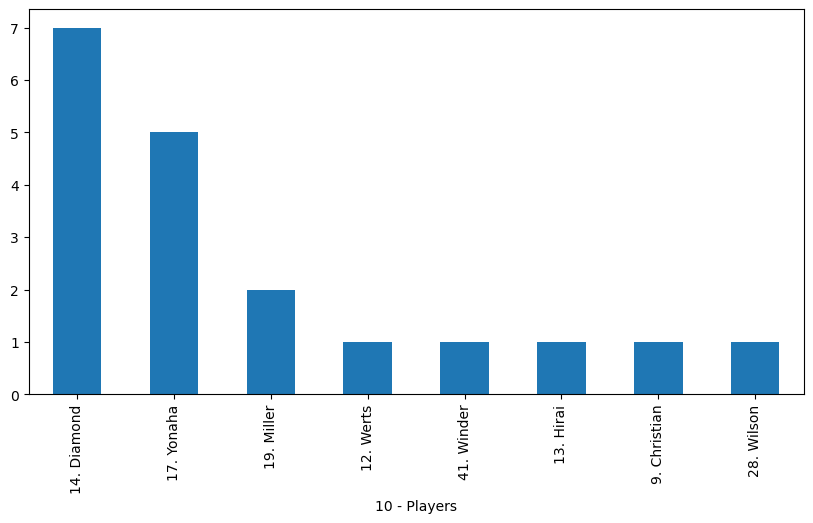

In [32]:
# Who parricipated in corner kicks the most?
team_corners['10 - Players'].str.split(',')\
    .explode().str.strip()\
    .value_counts()\
    .plot(kind='bar', figsize=(10, 5))

## Goal kicks

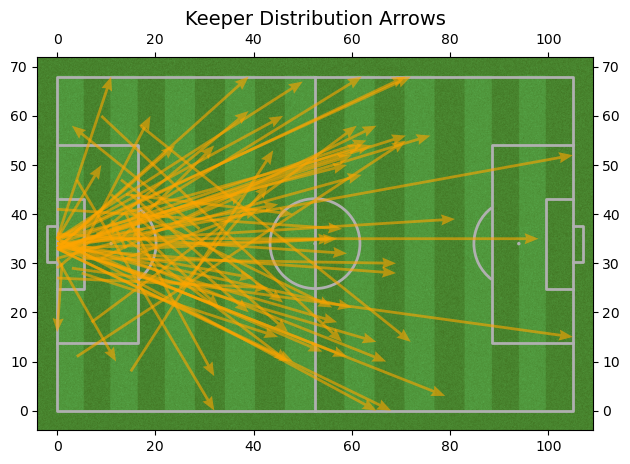

In [33]:
team_keep_distribution = team_data[(team_data['code']=='Utah St. Aggies - Goalkeeper distributions')]

# Draw pitch
pitch = Pitch(
    pitch_length=105, pitch_width=68, pitch_type='uefa',
    pitch_color='grass', stripe=True, goal_type='box',
    #half=True, 
    label=True, axis=True, tick=True
)
fig, ax = pitch.draw()

# Draw arrows
pitch.arrows(
    xstart=team_keep_distribution['11 - Start location X'],
    ystart=team_keep_distribution['12 - Start location Y'],
    xend=team_keep_distribution['15 - End location X'],
    yend=team_keep_distribution['16 - End location Y'],
    color='orange',
    ax=ax,
    width=2,
    headwidth=4,
    alpha=0.6,
    zorder=3
)

plt.title("Keeper Distribution Arrows", fontsize=14)
plt.show()

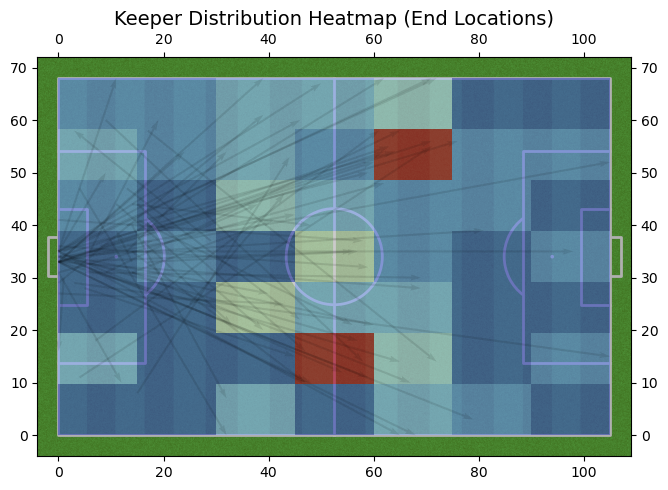

In [34]:
# Extract coordinates
x_start = team_keep_distribution['11 - Start location X']
y_start = team_keep_distribution['12 - Start location Y']
x_end = team_keep_distribution['15 - End location X']
y_end = team_keep_distribution['16 - End location Y']

# Set up the pitch
pitch = Pitch(
    pitch_length=105, pitch_width=68, pitch_type='uefa',
    pitch_color='grass', stripe=True, goal_type='box',
    label=True, axis=True, tick=True
)

fig, ax = pitch.draw(figsize=(8, 5))

# Plot heatmap of start locations
bin_stat = pitch.bin_statistic(x_end, y_end, statistic='count', bins=(7, 7))
pitch.heatmap(bin_stat, ax=ax, cmap='coolwarm', alpha=0.6)

# Optional: overlay arrows (lighter and less prominent)
pitch.arrows(
    xstart=x_start,
    ystart=y_start,
    xend=x_end,
    yend=y_end,
    color='black',
    ax=ax,
    width=1.5,
    headwidth=3,
    alpha=0.1,   # Lower alpha to avoid clutter
    zorder=2
)

# Title
plt.title("Keeper Distribution Heatmap (End Locations)", fontsize=14)
plt.show()


<Axes: xlabel='10 - Players'>

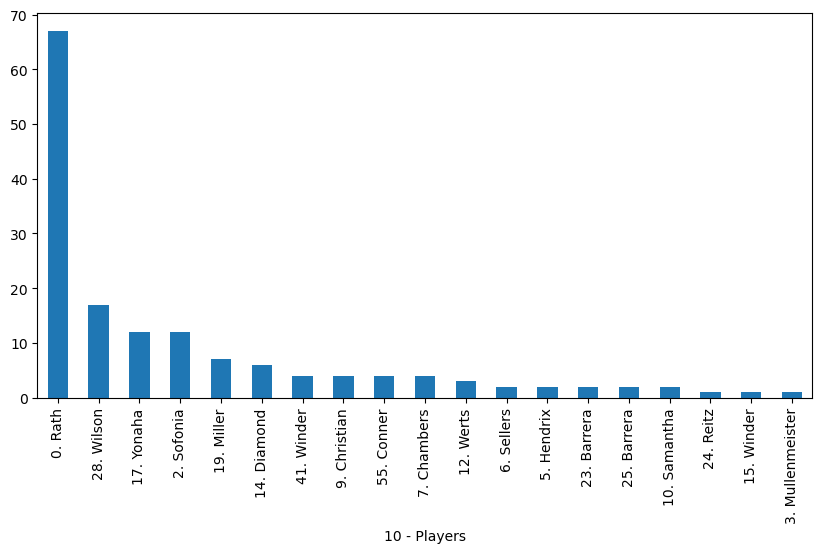

In [35]:
team_keep_distribution['10 - Players'].str.split(',')\
    .explode().str.strip()\
    .value_counts()\
    .plot(kind='bar', figsize=(10, 5))

## Player data keep distribution receiver

In [36]:
pd.set_option('display.max_rows', None)
player_data.head(100)

,ID,Player Code,Start Time,End Time,Action Type,Additional Labels,Team
0,1,2. Sofonia,8.269643,14.834373,Pass,Short or medium pass,Utah State
1,2,41. Winder,11.834373,16.848240,Pass,"Carry, Short or medium pass",Utah State
2,3,41. Winder,14.848240,18.848240,Interception,Loss,Utah State
3,4,99. Moore,13.867879,18.867879,Pass,"Back pass, Recovery, Short or medium pass",Kansas
4,5,15. Castans,15.945419,19.945419,Touch,,Kansas
5,6,41. Winder,25.390332,29.390332,Throw in,,Utah State
6,7,2. Page,27.317856,31.317856,Duel,"Aerial duel, Loss",Kansas
7,8,7. Chambers,28.194309,33.194309,Pass,"Back pass, Head pass, Recovery, Counterpressing recovery, Short or medium pass",Utah State
8,9,9. Christian,29.766819,34.766819,Pass,"Forward pass, Head pass, Pass to final third, Short or medium pass",Utah State
9,10,7. Chambers,32.294047,36.294047,Duel,"Ground duel, Offensive duel, Carry",Utah State


In [37]:
results = []

# Loop through all rows in the original DataFrame
for i in range(len(player_data) - 1):  # stop 1 row before the end
    row = player_data.iloc[i]
    next_row = player_data.iloc[i + 1]

    # Step 1: only consider Utah Valley Goal kicks
    if row['Action Type'] == "Goal kick" and row['Team'] == "Utah State":
        receiver = next_row['Player Code']
        receiver_team = next_row['Team']

        # Step 2: only track Funn or Owens as GK receivers
        if receiver in ["17. Yonaha", "28. Wilson"] and receiver_team == "Utah State":
            # Step 3: scan forward to find next Utah Valley player
            for j in range(i + 2, len(player_data)):
                next_player = player_data.iloc[j]
                next_team = next_player['Team']

                if next_team == "Utah State" and next_player['Player Code'] != receiver:
                    next_receiver = next_player['Player Code']
                    results.append((receiver, next_receiver))
                    break  # stop at first UVU teammate

# Convert results to DataFrame and summarize
df_chain = pd.DataFrame(results, columns=['GK Receiver', 'Next Receiver'])
summary = df_chain.value_counts().reset_index(name="Count")
print(summary)


  GK Receiver Next Receiver  Count
0  28. Wilson       0. Rath      2
1  17. Yonaha    19. Miller      1
2  17. Yonaha    2. Sofonia      1
3  17. Yonaha    41. Winder      1
4  28. Wilson    19. Miller      1
5  28. Wilson   23. Barrera      1
6  28. Wilson    55. Conner      1
